# 120 years of Olympic Data Analysis
### Predicting an Athlete's Performance Score


---

>> A regression model to predict an athlete's performance score in a specific Olympic event using features such as their sport, event, previous scores, and performance metrics.

---

Python - **Team Jupyter**

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data / Data Preparation</a>

<a href=#three>4. Exploratory Data Analysis(EDA)</a>

<a href=#four>5. Feature Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    

In [40]:
# Libraries for data loading, data manipulation and data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
# 2. Loading the Data/ Data Preparation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [41]:
# Load the first dataset
df1 = pd.read_csv("athlete_events.csv")
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [42]:
df1.shape

(271116, 15)

In [43]:
# Load the second dataset
df2 = pd.read_csv("noc_regions.csv")
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [44]:
df2.shape

(230, 3)

<a id="three"></a>
# 3. Exploratory Data Analysis(EDA)
<a class="anchor" id="1.2"></a>
<a href=#cont>Back to Table of Contents</a>

---



>> To maximize the analysis, I will merge the two datasets, **df1** and **df2**, based on the common column **'NOC'**. By doing so, we can combine the information from both datasets that corresponds to the same 'NOC' values. This will allow us to leverage the shared information and perform comprehensive analysis using the merged dataset.


---

In [45]:
merged_df = pd.merge(df1, df2, on='NOC')
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [46]:
# All columns present in the merged dataset
merged_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [47]:
# Size of merged dataset
merged_df.shape

(270767, 17)

In [48]:
merged_df.describe()

,ID,Age,Height,Weight,Year
count,270767.000000,261305.000000,210684.000000,207982.000000,270767.000000
mean,68229.276832,25.559783,175.344250,70.709523,1978.362297
std,39017.998824,6.392501,10.519556,14.350094,29.884637
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34630.500000,21.000000,168.000000,60.000000,1960.000000
50%,68187.000000,24.000000,175.000000,70.000000,1988.000000
75%,102065.500000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [50]:
# Checking for empty cells
merged_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
region        21
notes     265728
dtype: int64

Distribution of values in numerical variables:


In [51]:
numerical_cols=["Age", "Height", "Year", "Weight"]
merged_df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,261305.0,25.559783,6.392501,10.0,21.0,24.0,28.0,97.0
Height,210684.0,175.344250,10.519556,127.0,168.0,175.0,183.0,226.0
Year,270767.0,1978.362297,29.884637,1896.0,1960.0,1988.0,2002.0,2016.0
Weight,207982.0,70.709523,14.350094,25.0,60.0,70.0,79.0,214.0


Distribution of values in categorical variable:

In [52]:
categorical_cols=["Name", "Sex", "Team", "NOC", "Games","Season", "City", "Sport", "Event", "Medal", "region"]
merged_df[categorical_cols].describe().T

,count,unique,top,freq
Name,270767,134566,Robert Tait McKenzie,58
Sex,270767,2,M,196374
Team,270767,1179,United States,17847
NOC,270767,229,USA,18853
Games,270767,51,2000 Summer,13798
Season,270767,2,Summer,222203
City,270767,42,London,22389
Sport,270767,66,Athletics,38596
Event,270767,765,Football Men's Football,5733
Medal,39774,3,Gold,13371


 > ### 1. Approach to  handle missing data <br>
    >- Drop columns with a large number of missing values, such as **'notes'** also the values of **'notes'** are not relevant to the PR.<br>
    >- For columns like **'Age'**, **'Height'**, **'Weight'**, and **'region'**, will be filled with appropriate methods like<br> mean, median, or mode based on the column's distribution and context.
    >- The **'Medal'** column will be considered that athletes without a medal may have a performance <br>score of zero.

In [53]:
merged_df.drop('notes', axis=1, inplace=True)

In [54]:
merged_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

>> After executing the above code, the **'notes'** column has been successfully removed from the DataFrame. <br>This decision was made due to the high number of missing values in the column.<br> By eliminating this column, we prevent any potential misleading analysis that could result from attempting to work with incomplete or unreliable data.

>> To fill up other columns like **age**, **weight** and **height**, some factors are to be considered like the type of event performed by the athlete

In [55]:
# checking the numer of unique sport in the dataset
len(merged_df['Sport'].unique())

66

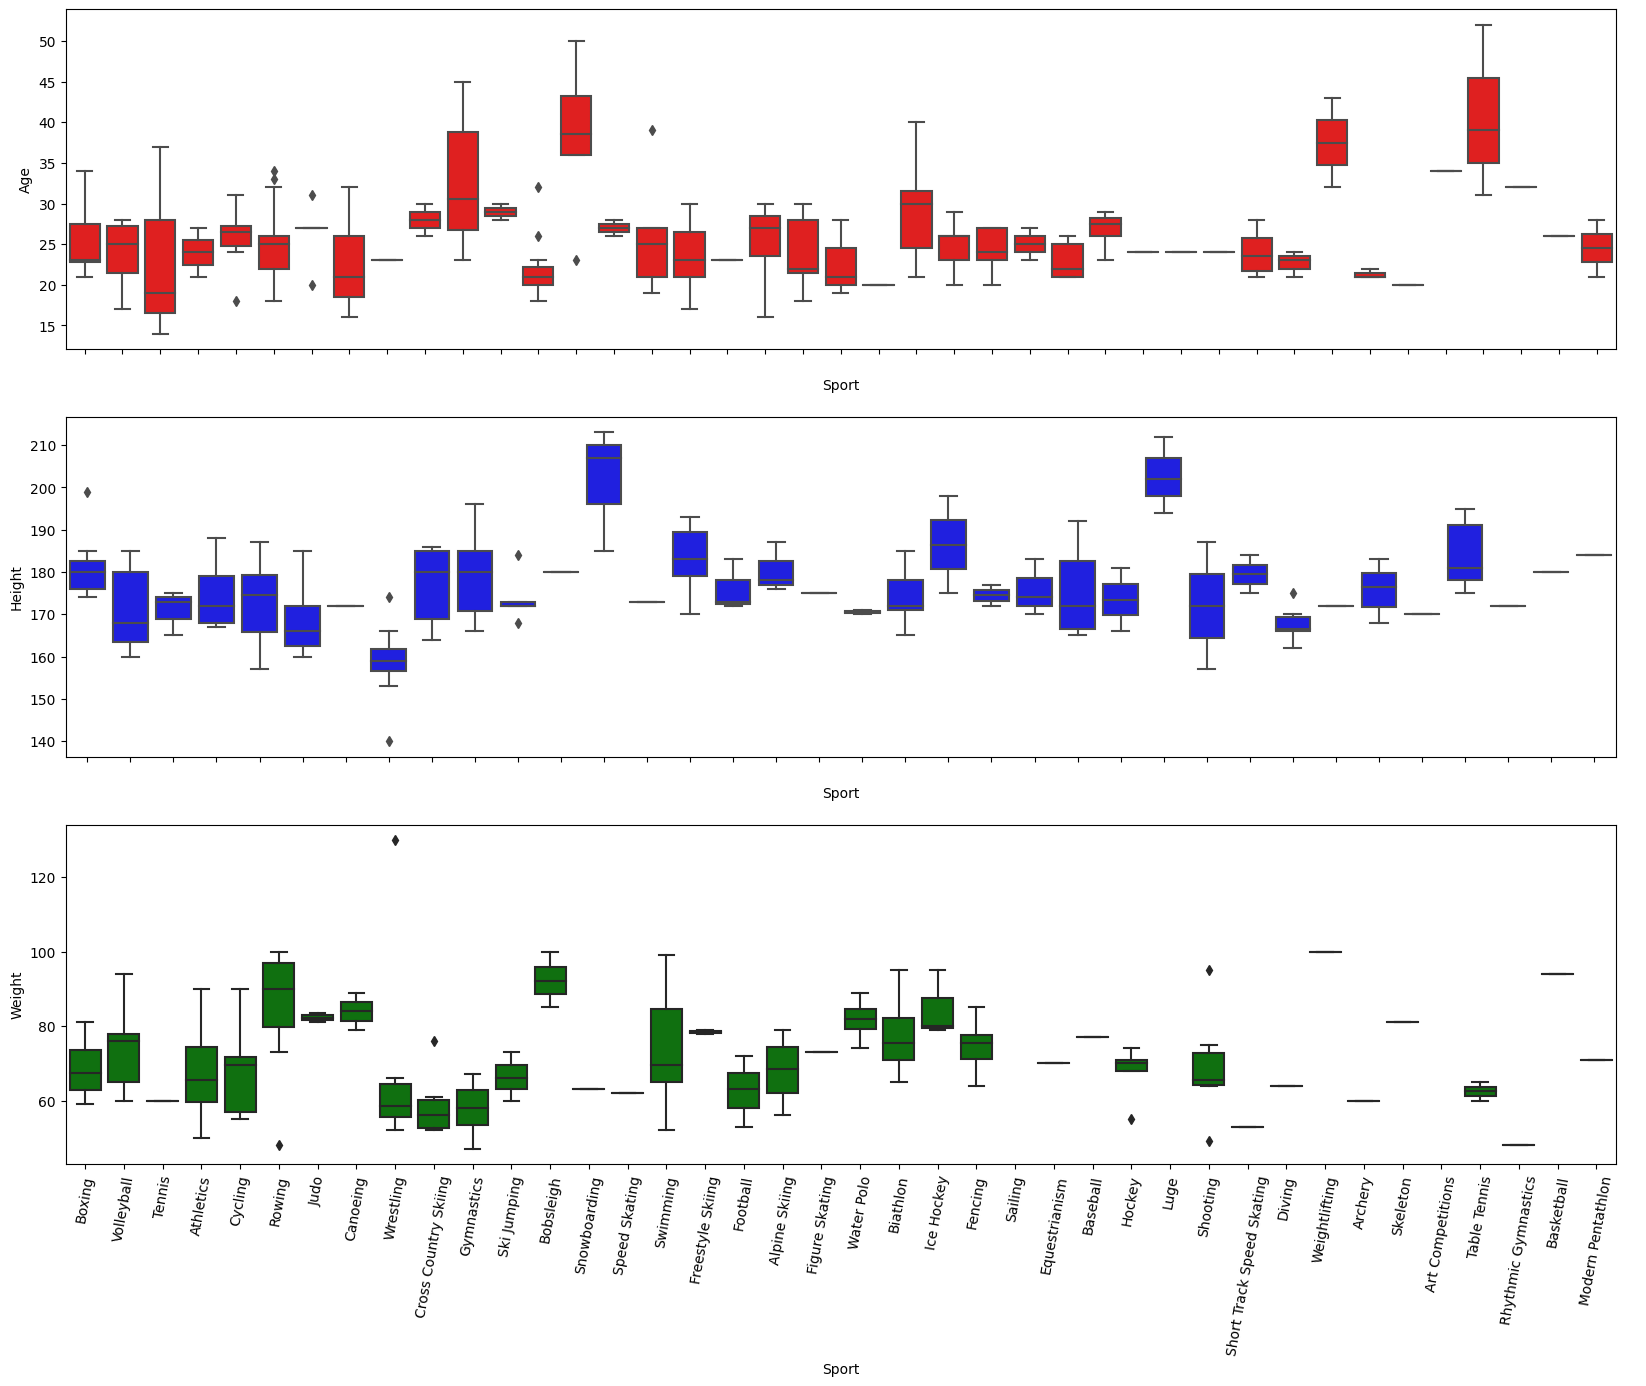

In [56]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
plt.xticks(color='white')
sns.boxplot(merged_df['Sport'].sample(200), merged_df['Age'], color='red')
plt.subplot(3,1,2)
plt.xticks(color='white')
sns.boxplot(merged_df['Sport'].sample(200), merged_df['Height'], color='blue')
plt.subplot(3,1,3)
sns.boxplot(merged_df['Sport'].sample(200), merged_df['Weight'], color='green')
plt.xticks(rotation=80)
plt.show()

>> The plot above show that the ages, weights and heights of the athletes varies by the type of sport

Hence the age, height and weight columns is filled with their respective mean for each sport

In [57]:
mean_age_per_sport = merged_df.groupby('Sport')['Age'].mean().round()
mean_height_per_sport = merged_df.groupby('Sport')['Height'].mean().round()
mean_weight_per_sport = merged_df.groupby('Sport')['Weight'].mean().round()

# converting unique sport from index to list
index_list = mean_age_per_sport.index.values.tolist()

In [58]:
for index, row in merged_df.iterrows():
    if row['Sport'] in mean_age_per_sport.index:
        sport_index = index_list.index(row['Sport'])
        merged_df['Age'].replace(float('NaN'), mean_age_per_sport[sport_index], inplace=True)
        merged_df['Weight'].replace(float('NaN'), mean_weight_per_sport[sport_index], inplace=True)
        merged_df['Height'].replace(float('NaN'), mean_height_per_sport[sport_index], inplace=True)
        

The columns have been filled with the mean values for each sport

>> Using the **mean** helps preserve the overall average Age of the dataset.<br> The median is a robust measure of central tendency that is less sensitive to outliers compared to the mean.<br> By using the median, we ensure that the filled values align with the typical or representative weight observed in the dataset.<br> By filling missing values in 'region' with the mode, we assign the most common region to the missing values.

In [59]:
# List of countries by continent
asia = ['Afghanistan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Timor-Leste',
        'Georgia', 'India', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Japan', 'Kyrgyzstan', 'Kuwait', 'Laos', 'Lebanon',
        'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine',
        'Philippines', 'Qatar', 'Saudi Arabia', 'South Korea', 'Syria', 'Taiwan', 'Sri Lanka', 'Tajikistan', 'Thailand', 
         'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen', 'Azerbaijan', 'Indonesia']


europe = ['Albania', 'Andorra', 'Angola', 'Antigua', 'Armenia', 'Austria', 'Azerbaijan', 
          'Belgium', 'Bosnia and Herzegovina', 'Belize', 'Belarus', 'Czech Republic', 'Bulgaria', 
          'Croatia', 'Cyprus', 'Denmark', 'Hungary', 'Iceland', 'Italy', 'Kazakhstan', 'Kosovo', 'Finland',
          'France', 'Georgia', 'Germany', 'Greece', 'Ireland', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
          'Latvia', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 
          'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden','Turkey',
          'Switzerland', 'Ukraine', 'UK', 'Macedonia', 'Virgin Islands, British']

africa = ['Angola', 'Algeria', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 
          'Democratic Republic of the Congo', 'Chad', 'Central African Republic', 'Republic of Congo',
          'Democratic Republic of the Congo', 'Gabon', 'Gambia', 'Ghana', 'Equatorial Guinea', 'Guinea',
          'Guinea-Bissau', 'Morocco', 'Egypt', 'Kenya', 'Libya', 'Mali', 'Senegal', 'Solomon Islands', 
          'Somalia', 'South Sudan', 'Tunisia', 'Zimbabwe', 'Zambia', 'Sudan', 'Sierra Leone', 'Comoros',
          'Ivory Coast', 'Djibouti', 'Eritrea', 'Swaziland', 'Ethiopia', 'Lesotho', 'Liberia', 'Madagascar',
          'Malawi', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 
          'Sao Tome and Principe', 'Seychelles', 'South Africa', 'Tanzania', 'Togo', 'Uganda']

north_america = ['Antigua', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica',
                 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica',
                  'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts', 'Saint Vincent', 'Saint Lucia', 'Trinidad', 
                 'USA', 'Cayman Islands', 'American Samoa', 'Puerto Rico', 'Aruba', 'Bermuda']

south_america = ['Argentina', 'Boliva', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
                 'Peru', 'Suriname', 'Uruguay', 'Venezuela', 'Curacao']

oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 
           'Palau', 'Papua New Guinea', 'Samoa', 'Tonga', 'Cook Islands', 'Individual Olympic Athletes',
           'Vanuatu', 'nan', 'Guam', 'US']

# Create a new column 'continent' in the 'df' DataFrame and assign continent values
merged_df['continent'] = pd.np.where(merged_df['region'].isin(europe), 'Europe',
                pd.np.where(merged_df['region'].isin(africa), 'Africa',
                pd.np.where(merged_df['region'].isin(asia), 'Asia',
                pd.np.where(merged_df['region'].isin(north_america), 'North America',
                pd.np.where(merged_df['region'].isin(south_america), 'South America',
                pd.np.where(merged_df['region'].isin(oceania), 'Oceania','unknown')))))  )

---

>## Visualization<br>
    
    
---

Create a dataframe of total medals for each country.

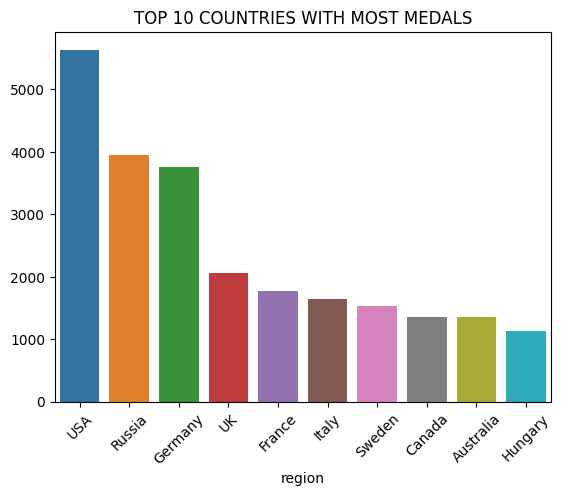

In [60]:
# top countries with most medals
medalists_df = merged_df[merged_df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

top_countries = medalists_df.groupby('region')['Medal'].count().sort_values(ascending=False)
sns.barplot(top_countries.index[:10], top_countries.values[:10])
plt.xticks(rotation=45)
plt.title('TOP 10 COUNTRIES WITH MOST MEDALS')
plt.show()

* The plot shows that USA has the most number of medals cummulated over the years with Russia and Germany following

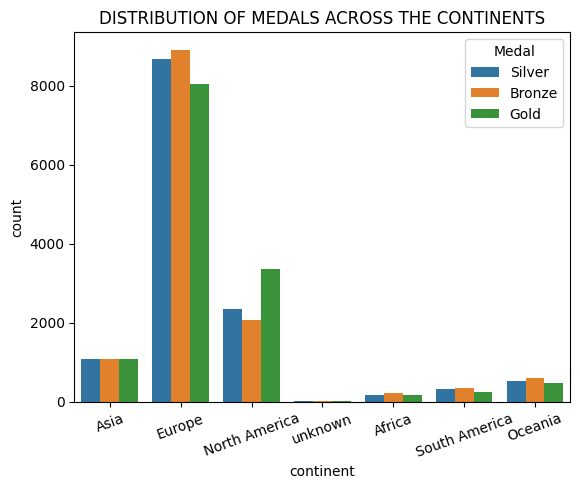

continent     ID             
Medal                Bronze  Gold Silver
0             Africa    224   174    170
1               Asia   1091  1076   1090
2             Europe   8907  8030   8663
3      North America   2079  3362   2336
4            Oceania    607   472    517
5      South America    358   244    323
6            unknown     25    13     13

In [61]:
pivot = pd.pivot_table(merged_df, values=['ID'], 
                                columns=['Medal'],
                                index=['continent'], 
                                aggfunc='count')
pivot = pivot.reset_index()
sns.countplot(medalists_df['continent'], hue=medalists_df['Medal'])
plt.xticks(rotation=20)
plt.title('DISTRIBUTION OF MEDALS ACROSS THE CONTINENTS')
plt.show()
pivot

## ANALYSIS IN AFRICA

In [62]:
africa_df = merged_df[merged_df['continent']== 'Africa'].reset_index(drop=True)

In [63]:
len(africa_df['region'].unique())

54

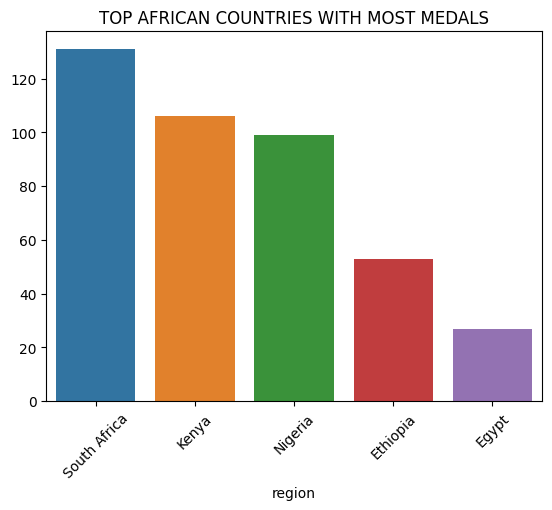

In [64]:
top_african_countries = africa_df.groupby('region')['Medal'].count().sort_values(ascending=False)
sns.barplot(top_african_countries.index[:5], top_african_countries.values[:5])
plt.xticks(rotation=45)
plt.title('TOP AFRICAN COUNTRIES WITH MOST MEDALS')
plt.show()

In [ ]:
# Scatter plot of 'Age' vs 'Performance Score'


In [ ]:
# Scatter plot of 'Height' vs 'Performance Score'


In [ ]:
# Scatter plot of 'Weight' vs 'Performance Score'


---

>### Encoding -  Convert categorical variables to numerical representations <br>
    >- Encode categorical features like **'sport'**, **'Event'**, **'Team'**, **'NOC'**, **'Season'** and **'City'** into numerical representations using techniques like **one-hot encoding** or **label encoding**.
    
    
---


In [68]:
categ_col = merged_df.select_dtypes(include=["object", "category"]).columns

In [70]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
merged_df['Sport_encoded'] = label_encoder.fit_transform(merged_df['Sport'])
merged_df['Event_encoded'] = label_encoder.fit_transform(merged_df['Event'])
merged_df['Team_encoded'] = label_encoder.fit_transform(merged_df['Team'])
merged_df['NOC_encoded'] = label_encoder.fit_transform(merged_df['NOC'])
merged_df['Season_encoded'] = label_encoder.fit_transform(merged_df['Season'])
merged_df['City_encoded'] = label_encoder.fit_transform(merged_df['City'])

In [73]:
medal_dict = {'Gold': 1, 'Silver': 2 ,'Bronze': 3, 'No Medal': 0}

merged_df['Medal'] = merged_df['Medal'].map(medal_dict)

In [ ]:
# Specify the columns to be dropped in a list
col_drop = ["ID", "Name", "Sex", "Games", "Year"]

# Drop the specified columns from the DataFrame
merged_df = merged_df.drop(columns=col_drop)

<a id="four"></a>
# 4. Feature Engineering
<a class="anchor" id="1.2"></a>
<a href=#cont>Back to Table of Contents</a>

---


---

>### 3. Remove irrelevant columns<br>
    >- Remove columns that are not relevant to the prediction task, such as **'ID'**, **'Name'**, **'Sex'**, **'Games'**, and **'Year'**.<br> 
    >- This helps to improve the quality and efficiency of data analysis and modeling. 
    
    
---


In [78]:
corr_matrix = merged_df.corr()

corr_with_target = corr_matrix['Medal']
sorted_corr = corr_with_target.sort_values()
print(sorted_corr)

Year             -0.051809
Season_encoded   -0.035956
City_encoded     -0.006777
ID                0.011843
Age               0.021896
Team_encoded      0.047802
NOC_encoded       0.049244
Height            0.054377
Event_encoded     0.056123
Sport_encoded     0.057637
Weight            0.061482
Medal             1.000000
Name: Medal, dtype: float64
